In [17]:
import mxnet as mx
import numpy as np
import pandas as pd
from mxnet import nd, autograd, gluon


In [2]:
data_ctx = mx.cpu()

### Process Data

In [60]:
data = pd.read_csv('processed_Iris.csv')

In [108]:
data_iter = mx.io.CSVIter(data_csv='processed_Iris.csv', data_shape=(5,), batch_size=150,round_batch = False)

X=[]
Y=[]
for batch in data_iter:

    temp = batch.data[0]
    for i in temp:
        X.append(i[:4])
        Y.append(i[4])

### Load Training Data

In [144]:
# train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=True
#                                                                  , transform=transform),
#                                       batch_size, shuffle=True)

# test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.MNIST(train=False
#                                                                 , transform=transform),
#                                      batch_size, shuffle=False)

# Practice using Iris Dataset

batch_size = 50
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, Y),
                                        batch_size=batch_size,
                                        shuffle=True)

### Define the Model

In [195]:
num_hidden = 4 
num_outputs = 3
net = gluon.nn.Sequential()
with net.name_scope():
    # 2 Hidden Layers
    
    
    ###########################
    # Adding first hidden layer
    ###########################
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    
    ###########################
    # Adding dropout with rate .5 to the first hidden layer
    ###########################
    net.add(gluon.nn.Dropout(0.1))

    ###########################
    # Adding first hidden layer
    ###########################
    net.add(gluon.nn.Dense(num_hidden, activation="relu"))
    ###########################
    # Adding dropout with rate .5 to the second hidden layer
    ###########################
    net.add(gluon.nn.Dropout(0.1))

    ###########################
    # Adding the output layer
    ###########################
    net.add(gluon.nn.Dense(num_outputs))

### Parameter Initialization

In [196]:
net.collect_params().initialize(mx.init.Xavier(magnitude = 2.24),ctx = data_ctx)

### Softmax CrossEntropy Loss

In [197]:
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()

### Optimizer

In [198]:
trainer = gluon.Trainer(net.collect_params(), 'ADAM', {'learning_rate': .005})

### Evaluation Metric

In [199]:
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(data_ctx)
        label = label.as_in_context(data_ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]

### Execute Training

In [200]:
epochs = 700
smoothing_constant = .01

loss_list=[]
train_acc = []
for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(data_ctx).reshape((-1, 4))
        label = label.as_in_context(data_ctx)
        
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
            loss.backward()
        trainer.step(data.shape[0])

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + (smoothing_constant) * curr_loss)

#    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    loss_list.append(curr_loss)
    train_acc.append(train_accuracy)
    print("Epoch %s. Loss: %s, Train_acc %s" %
          (e, moving_loss, train_accuracy))

Epoch 0. Loss: 1.1935239762067793, Train_acc 0.333333333333
Epoch 1. Loss: 1.191799668072429, Train_acc 0.333333333333
Epoch 2. Loss: 1.1897135245845076, Train_acc 0.333333333333
Epoch 3. Loss: 1.187486742722545, Train_acc 0.333333333333
Epoch 4. Loss: 1.1853057692334141, Train_acc 0.286666666667
Epoch 5. Loss: 1.1829687742653436, Train_acc 0.246666666667
Epoch 6. Loss: 1.1806289227245599, Train_acc 0.333333333333
Epoch 7. Loss: 1.1783153561915518, Train_acc 0.333333333333
Epoch 8. Loss: 1.176047686513374, Train_acc 0.333333333333
Epoch 9. Loss: 1.173813372545476, Train_acc 0.333333333333
Epoch 10. Loss: 1.1716221734820231, Train_acc 0.333333333333
Epoch 11. Loss: 1.1694973809537081, Train_acc 0.333333333333
Epoch 12. Loss: 1.1674315910474744, Train_acc 0.333333333333
Epoch 13. Loss: 1.165422452197005, Train_acc 0.333333333333
Epoch 14. Loss: 1.163467764184438, Train_acc 0.333333333333
Epoch 15. Loss: 1.1615633650635027, Train_acc 0.333333333333
Epoch 16. Loss: 1.1597066242528589, Trai

Epoch 151. Loss: 0.5321192084109513, Train_acc 0.973333333333
Epoch 152. Loss: 0.5280314509506547, Train_acc 0.973333333333
Epoch 153. Loss: 0.5264410537366135, Train_acc 0.973333333333
Epoch 154. Loss: 0.5241138968050624, Train_acc 0.966666666667
Epoch 155. Loss: 0.5192151997641188, Train_acc 0.966666666667
Epoch 156. Loss: 0.5157603628097185, Train_acc 0.966666666667
Epoch 157. Loss: 0.5117693566256715, Train_acc 0.966666666667
Epoch 158. Loss: 0.5101870271974904, Train_acc 0.98
Epoch 159. Loss: 0.5092105148915479, Train_acc 0.98
Epoch 160. Loss: 0.5089489743809139, Train_acc 0.973333333333
Epoch 161. Loss: 0.5095574855694187, Train_acc 0.973333333333
Epoch 162. Loss: 0.5086543314813982, Train_acc 0.973333333333
Epoch 163. Loss: 0.5047650758958779, Train_acc 0.973333333333
Epoch 164. Loss: 0.5043006921894105, Train_acc 0.966666666667
Epoch 165. Loss: 0.5033911069660375, Train_acc 0.966666666667
Epoch 166. Loss: 0.5031714207777825, Train_acc 0.973333333333
Epoch 167. Loss: 0.502671526

Epoch 300. Loss: 0.4158459536881124, Train_acc 0.98
Epoch 301. Loss: 0.4132993635671646, Train_acc 0.98
Epoch 302. Loss: 0.4129755874328827, Train_acc 0.98
Epoch 303. Loss: 0.4135318166506291, Train_acc 0.98
Epoch 304. Loss: 0.41350998245370596, Train_acc 0.98
Epoch 305. Loss: 0.41221182021519026, Train_acc 0.98
Epoch 306. Loss: 0.41381882936467035, Train_acc 0.98
Epoch 307. Loss: 0.4123509947661353, Train_acc 0.98
Epoch 308. Loss: 0.41311879735675616, Train_acc 0.98
Epoch 309. Loss: 0.4130342513666373, Train_acc 0.98
Epoch 310. Loss: 0.41311588959514495, Train_acc 0.98
Epoch 311. Loss: 0.4136631236486209, Train_acc 0.973333333333
Epoch 312. Loss: 0.411340495581056, Train_acc 0.98
Epoch 313. Loss: 0.41022543514194715, Train_acc 0.98
Epoch 314. Loss: 0.40735454094995927, Train_acc 0.98
Epoch 315. Loss: 0.40612649958681285, Train_acc 0.98
Epoch 316. Loss: 0.4047671833867833, Train_acc 0.973333333333
Epoch 317. Loss: 0.40237915630779125, Train_acc 0.973333333333
Epoch 318. Loss: 0.4034638

Epoch 454. Loss: 0.40686205214856236, Train_acc 0.98
Epoch 455. Loss: 0.40663279398834723, Train_acc 0.98
Epoch 456. Loss: 0.4072260615821024, Train_acc 0.98
Epoch 457. Loss: 0.4090266904922526, Train_acc 0.98
Epoch 458. Loss: 0.40784606914953997, Train_acc 0.973333333333
Epoch 459. Loss: 0.40879670423823894, Train_acc 0.98
Epoch 460. Loss: 0.409185246738361, Train_acc 0.98
Epoch 461. Loss: 0.40561950900177884, Train_acc 0.98
Epoch 462. Loss: 0.40819565908983163, Train_acc 0.98
Epoch 463. Loss: 0.411031275867891, Train_acc 0.973333333333
Epoch 464. Loss: 0.4151748613160466, Train_acc 0.973333333333
Epoch 465. Loss: 0.4152789217871291, Train_acc 0.98
Epoch 466. Loss: 0.41476828749351663, Train_acc 0.98
Epoch 467. Loss: 0.4154103018944014, Train_acc 0.98
Epoch 468. Loss: 0.4156329055525686, Train_acc 0.98
Epoch 469. Loss: 0.4186476831989924, Train_acc 0.973333333333
Epoch 470. Loss: 0.4180383866755822, Train_acc 0.973333333333
Epoch 471. Loss: 0.41744542600696594, Train_acc 0.98
Epoch 47

Epoch 618. Loss: 0.3948517085658316, Train_acc 0.98
Epoch 619. Loss: 0.3927247018944793, Train_acc 0.98
Epoch 620. Loss: 0.391788024283482, Train_acc 0.98
Epoch 621. Loss: 0.38978554114549047, Train_acc 0.98
Epoch 622. Loss: 0.389650408951614, Train_acc 0.98
Epoch 623. Loss: 0.38994773796892407, Train_acc 0.98
Epoch 624. Loss: 0.390981608433468, Train_acc 0.98
Epoch 625. Loss: 0.39371764465211995, Train_acc 0.98
Epoch 626. Loss: 0.3942389863925218, Train_acc 0.98
Epoch 627. Loss: 0.39455724617323373, Train_acc 0.98
Epoch 628. Loss: 0.3920162886430169, Train_acc 0.98
Epoch 629. Loss: 0.393611502226433, Train_acc 0.98
Epoch 630. Loss: 0.39292001029669726, Train_acc 0.98
Epoch 631. Loss: 0.39186843950578415, Train_acc 0.98
Epoch 632. Loss: 0.39121867711531083, Train_acc 0.98
Epoch 633. Loss: 0.3900854013091267, Train_acc 0.98
Epoch 634. Loss: 0.38896648674282025, Train_acc 0.98
Epoch 635. Loss: 0.3868928485843097, Train_acc 0.98
Epoch 636. Loss: 0.3885898426891331, Train_acc 0.98
Epoch 63

### Visualize Predictions

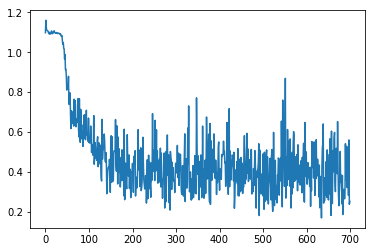

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(len(loss_list)),loss_list)